['2018-10-01' '2018-10-02' '2018-10-03' ... '2021-09-28' '2021-09-29'
 '2021-09-30']


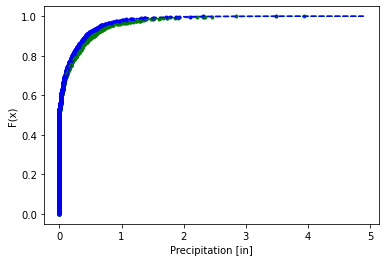

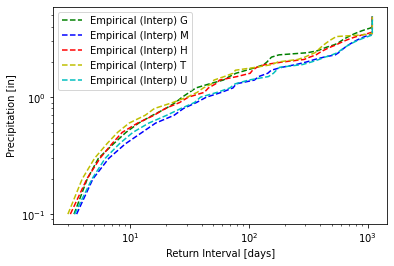

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
# Data
# Data Initialization
Rain_input_Greasy = pd.read_csv("Greasy_precipdata.csv")
Rain_input_Middle = pd.read_csv("MiddleMarys_PrecipData.csv")
Rain_input_Head = pd.read_csv("Headwater_precipdata.csv")
Rain_input_Tumtum = pd.read_csv("Tumtum_precipdata.csv")
Rain_input_Upper = pd.read_csv("UpperMarys_precipdata.csv")


day_input = np.arange('2018-10-01', '2021-10-01', dtype = 'datetime64[D]')
print(day_input)

# Sorted the Data
#corvo_df = pd.DataFrame(corvo_rain)

Rain_input_sortG = Rain_input_Greasy.sort_values(by=['ppt (inches)'], ascending = True)

Rain_input_sortM = Rain_input_Middle.sort_values(by=['ppt (inches)'], ascending = True)

Rain_input_sortH = Rain_input_Head.sort_values(by=['ppt (inches)'], ascending = True)

Rain_input_sortT = Rain_input_Tumtum.sort_values(by=['ppt (inches)'], ascending = True)

Rain_input_sortU = Rain_input_Upper.sort_values(by=['ppt (inches)'], ascending = True)


# Reset the Indicies and then dropped the old index column
Rain_input_sortG = Rain_input_sortG.reset_index()
Rain_input_sortG = Rain_input_sortG.drop(columns = ['index'])

Rain_input_sortM = Rain_input_sortM.reset_index()
Rain_input_sortM = Rain_input_sortM.drop(columns = ['index'])

Rain_input_sortH = Rain_input_sortH.reset_index()
Rain_input_sortH = Rain_input_sortH.drop(columns = ['index'])

Rain_input_sortT = Rain_input_sortT.reset_index()
Rain_input_sortT = Rain_input_sortT.drop(columns = ['index'])

Rain_input_sortU = Rain_input_sortU.reset_index()
Rain_input_sortU = Rain_input_sortU.drop(columns = ['index'])

# added rank
Rain_input_sortG['Rank'] = np.arange(1, len(day_input)+1)
rankG = Rain_input_sortG['Rank']

Rain_input_sortM['Rank'] = np.arange(1, len(day_input)+1)
rankM = Rain_input_sortM['Rank']


Rain_input_sortH['Rank'] = np.arange(1, len(day_input)+1)
rankH = Rain_input_sortH['Rank']

Rain_input_sortT['Rank'] = np.arange(1, len(day_input)+1)
rankT = Rain_input_sortT['Rank']


Rain_input_sortU['Rank'] = np.arange(1, len(day_input)+1)
rankU = Rain_input_sortU['Rank']

# Estimated the Empirical Distribution of the Rainfall (F(x))

FG = np.empty(len(rankG))
valuesG = np.arange(len(rankG))
for num in valuesG:
    FG[num] =(rankG[num]/((len(rankG))+1))

FM = np.empty(len(rankM))
valuesM = np.arange(len(rankM))
for num in valuesM:
    FM[num] =(rankM[num]/((len(rankM))+1))

FH = np.empty(len(rankH))
valuesH = np.arange(len(rankH))
for num in valuesH:
    FH[num] =(rankH[num]/((len(rankH))+1))

FT = np.empty(len(rankT))
valuesT = np.arange(len(rankT))
for num in valuesT:
    FT[num] =(rankT[num]/((len(rankT))+1))

FU = np.empty(len(rankU))
valuesU = np.arange(len(rankU))
for num in valuesU:
    FU[num] =(rankU[num]/((len(rankU))+1))

# Called all of the relevant variables
Rain_input_sortG["F(x) G"] = FG
F_xG = Rain_input_sortG["F(x) G"]
daysG = Rain_input_sortG["Date"]
rankG = Rain_input_sortG["Rank"]
daily_rainG = Rain_input_sortG["ppt (inches)"]


Rain_input_sortM["F(x) M"] = FM
F_xM = Rain_input_sortM["F(x) M"]
daysM = Rain_input_sortM["Date"]
rankM = Rain_input_sortM["Rank"]
daily_rainM = Rain_input_sortM["ppt (inches)"]

Rain_input_sortH["F(x) H"] = FH
F_xH = Rain_input_sortH["F(x) H"]
daysH = Rain_input_sortG["Date"]
rankH = Rain_input_sortG["Rank"]
daily_rainH = Rain_input_sortH["ppt (inches)"]


Rain_input_sortT["F(x) T"] = FT
F_xT = Rain_input_sortT["F(x) T"]
daysT = Rain_input_sortT["Date"]
rankT = Rain_input_sortT["Rank"]
daily_rainT = Rain_input_sortT["ppt (inches)"]

Rain_input_sortU["F(x) U"] = FU
F_xU = Rain_input_sortU["F(x) U"]
daysU = Rain_input_sortU["Date"]
rankU = Rain_input_sortU["Rank"]
daily_rainU = Rain_input_sortU["ppt (inches)"]



#print(corvo_df_sort["F(x)"].head(99))
# Utilized Interp CDF
## First needed to get the x coordinates, and for this got the max and min values for precipitation
#rainmin, rainmax =daily_rain.min(), daily_rain.max()


## generated x values going from 500 to 2000
Precip_eval = np.arange(.1,5,.1)
## used np.interp to return the linear interpolation for further estimation
pptInterpCDFG = np.interp(Precip_eval,daily_rainG,F_xG)

pptInterpCDFM = np.interp(Precip_eval,daily_rainM,F_xM)

pptInterpCDFH = np.interp(Precip_eval,daily_rainH,F_xH)

pptInterpCDFT = np.interp(Precip_eval,daily_rainT,F_xT)

pptInterpCDFU = np.interp(Precip_eval,daily_rainU,F_xU)




fig4 = plt.figure()
ax4_1 = fig4.add_subplot(111)
# ax4_1.scatter,F_x, color ="tab:red", label = "observed")
ax4_1.plot(daily_rainG,F_xG,'g.', label = 'Greasy Data')
ax4_1.plot(daily_rainM,F_xM,'b.', label = 'Greasy Data')
ax4_1.plot(Precip_eval,pptInterpCDFG,'g--', label = 'Greasy Interpolated')
ax4_1.plot(Precip_eval,pptInterpCDFM,'b--', label = 'Greasy Interpolated')
#ax4_1.plot(Precip_eval,pptInterpCDFM,'r--', label = 'Greasy Interpolated')
ax4_1.set_xlabel('Precipitation [in]')
ax4_1.set_ylabel('F(x)')


# Solve for the RI using Interp method
pptDay = 10 # Storm event? How many days?
RI_interpG = 1/(1-pptInterpCDFG)
RI_interpM = 1/(1-pptInterpCDFM)
RI_interpH = 1/(1-pptInterpCDFH)
RI_interpT = 1/(1-pptInterpCDFT)
RI_interpU = 1/(1-pptInterpCDFU)
fig4_2 = plt.figure()
ax4_2 = fig4_2.add_subplot(111)
ax4_2.plot(RI_interpG,Precip_eval,'g--',label='Empirical (Interp) G')
ax4_2.plot(RI_interpM,Precip_eval,'b--',label='Empirical (Interp) M')
ax4_2.plot(RI_interpH,Precip_eval,'r--',label='Empirical (Interp) H')
ax4_2.plot(RI_interpT,Precip_eval,'y--',label='Empirical (Interp) T')
ax4_2.plot(RI_interpU,Precip_eval,'c--',label='Empirical (Interp) U')
#ax4_2.scatter(pptDay,Precip_eval[np.argmin((RI_interp-pptDay)**2)], color = 'b', label = '10 day depth')
ax4_2.set_yscale('log')
ax4_2.set_xscale('log')
ax4_2.set_xlabel("Return Interval [days]")
ax4_2.set_ylabel("Precipitation [in]")
ax4_2.legend()
plt.show()
#print('The %d-day storm has a depth of %.1fin using an interpolated CDF' % (
 #   pptDay, Precip_eval[np.argmin((RI_interp-pptDay)**2)]))


For Loop To Go Through The 5 Different Sub Basins

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
# Data Initialization
Rain_input_Greasy = pd.read_csv("Greasy_precipdata.csv")
Rain_input_Middle = pd.read_csv("MiddleMarys_PrecipData.csv")
Rain_input_Head = pd.read_csv("Headwater_precipdata.csv")
Rain_input_Tumtum = pd.read_csv("Tumtum_precipdata.csv")
Rain_input_Upper = pd.read_csv("UpperMarys_precipdata.csv")

# Now for Each of These 


# Constructed a Single Dataframe using a Dictionary to Develop Structure:
## Made sure that it was only the first Dataframe, and the preceeding dataframes precipitation column

precip_data = {
    'date': Rain_input_Greasy['Date'],
    'Greasy Precip': Rain_input_Greasy['ppt (inches)'],
    'Greasy Precip': Rain_input_Middle['ppt (inches)'],
    'Head Precip': Rain_input_Head['ppt (inches)'],
    'Tumtum Precip': Rain_input_Tumtum['ppt (inches)'],
    'Upper Precip': Rain_input_Upper['ppt (inches)'],

}

day_input = np.arange('2018-10-01', '2021-10-01', dtype = 'datetime64[D]')
print(day_input)

# Sorted the Data
#corvo_df = pd.DataFrame(corvo_rain)
Rain_input_sortG = Rain_input_Greasy.sort_values(by=['ppt (inches)'], ascending = True)

Rain_input_sortM = Rain_input_Middle.sort_values(by=['ppt (inches)'], ascending = True)

# Reset the Indicies and then dropped the old index column
Rain_input_sortG = Rain_input_sortG.reset_index()
Rain_input_sortG = Rain_input_sortG.drop(columns = ['index'])

Rain_input_sortM = Rain_input_sortM.reset_index()
Rain_input_sortM = Rain_input_sortM.drop(columns = ['index'])

# added rank
Rain_input_sortG['Rank'] = np.arange(1, len(day_input)+1)
rankG = Rain_input_sortG['Rank']

Rain_input_sortM['Rank'] = np.arange(1, len(day_input)+1)
rankM = Rain_input_sortM['Rank']
# Estimated the Empirical Distribution of the Rainfall (F(x))

FG = np.empty(len(rankG))
valuesG = np.arange(len(rankG))
for num in valuesG:
    FG[num] =(rankG[num]/((len(rankG))+1))

FM = np.empty(len(rankM))
valuesM = np.arange(len(rankM))
for num in valuesM:
    FM[num] =(rankM[num]/((len(rankM))+1))

# Called all of the relevant variables
Rain_input_sortG["F(x)"] = FG
F_xG = Rain_input_sortG["F(x)"]
daysG = Rain_input_sortG["Date"]
rankG = Rain_input_sortG["Rank"]
daily_rainG = Rain_input_sortG["ppt (inches)"]


Rain_input_sortM["F(x)"] = FM
F_xM = Rain_input_sortM["F(x)"]
daysM = Rain_input_sortM["Date"]
rankM = Rain_input_sortM["Rank"]
daily_rainM = Rain_input_sortM["ppt (inches)"]

#print(corvo_df_sort["F(x)"].head(99))
# Utilized Interp CDF
## First needed to get the x coordinates, and for this got the max and min values for precipitation
#rainmin, rainmax =daily_rain.min(), daily_rain.max()


## generated x values going from 500 to 2000
Precip_eval = np.arange(.1,5,.1)
## used np.interp to return the linear interpolation for further estimation
pptInterpCDFG = np.interp(Precip_eval,daily_rainG,F_xG)

pptInterpCDFM = np.interp(Precip_eval,daily_rainM,F_xM)

fig4 = plt.figure()
ax4_1 = fig4.add_subplot(111)
# ax4_1.scatter,F_x, color ="tab:red", label = "observed")
ax4_1.plot(daily_rainG,F_xG,'g.', label = 'Greasy Data')
ax4_1.plot(daily_rainM,F_xM,'b.', label = 'Greasy Data')
ax4_1.plot(Precip_eval,pptInterpCDFG,'g--', label = 'Greasy Interpolated')
ax4_1.plot(Precip_eval,pptInterpCDFM,'b--', label = 'Greasy Interpolated')
ax4_1.set_xlabel('Precipitation [in]')
ax4_1.set_ylabel('F(x)')


# Solve for the RI using Interp method
pptDay = 10 # Storm event? How many days?
RI_interpG = 1/(1-pptInterpCDFG)
RI_interpM = 1/(1-pptInterpCDFM)
fig4_2 = plt.figure()
ax4_2 = fig4_2.add_subplot(111)
ax4_2.plot(RI_interpG,Precip_eval,'g--',label='Empirical (Interp) G')
ax4_2.plot(RI_interpM,Precip_eval,'b--',label='Empirical (Interp) M')
#ax4_2.scatter(pptDay,Precip_eval[np.argmin((RI_interp-pptDay)**2)], color = 'b', label = '10 day depth')
ax4_2.set_yscale('log')
ax4_2.set_xscale('log')
ax4_2.set_xlabel("Return Interval [days]")
ax4_2.set_ylabel("Precipitation [in]")
ax4_2.legend()
plt.show()
print('The %d-day storm has a depth of %.1fin using an interpolated CDF' % (
    pptDay, Precip_eval[np.argmin((RI_interp-pptDay)**2)]))


Storm occuring once every year has a depth of 2.5 inches...